In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
general = pd.read_csv("../../data/general/ad_hominem_attacks.csv", sep=";")
adHominem = pd.read_csv("../../data/ad_hominem/reddit_ad_hominem.csv")

general = general[ general["Pieter"] + general["Murilo"] + general["Eric"] >= 2]

In [7]:
adHominem.shape

general["isAdHominem"] = np.where(general["fallacies.df.Intended.Fallacy"] == "Ad Hominem",True, False)
general.head()

,fallacies.df.Topic,fallacies.df.Intended.Fallacy,fallacies.df.Text,Eric,Pieter,Murilo,isAdHominem
0,Are humans to blame for certain animal extinct...,No Fallacy,"Yes, human beings have hunted and eaten animal...",1.0,1,1,False
1,Are humans to blame for certain animal extinct...,No Fallacy,Humans are not to be blamed for animal extinct...,0.0,1,1,False
7,Are humans to blame for certain animal extinct...,No Fallacy,Humans don't care enough for living beings.,1.0,1,1,False
9,Are humans to blame for certain animal extinct...,Ad Hominem,Of course. You throw your garbage into the oce...,1.0,1,1,True
11,Are Quentin Tarantinos movies too violent?,Ad Hominem,"Oh now, I'm not going to debate with you... Ha...",1.0,1,1,True


In [8]:
df = pd.concat([adHominem['body'], adHominem['ad_hominem']], axis=1, keys=['body', 'isAdHominem'])
df = df.append(pd.concat([general['fallacies.df.Text'], general['isAdHominem']], axis=1, keys=['body', 'isAdHominem']))
print(general.shape)
print(adHominem.shape)
print(df.shape)

df["body"] = df["body"].astype(str)
df["isAdHominem"] = df["isAdHominem"].astype(bool)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

(382, 7)
(29281, 22)
(29663, 2)


In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split( df, test_size=0.3, random_state=3)

print("In total, the train contains", sum(train["isAdHominem"] == True), "ad hominems")
print("In total, the test contains", sum(test["isAdHominem"] == True), "ad hominems")

In total, the train contains 2765 ad hominems
In total, the test contains 1228 ad hominems


In [10]:
features=3000

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer( ngram_range = (1, 1), max_features=features)
v.fit(train['body'].values.astype('U'))
x_train = v.transform(train['body'].values.astype('U'))
x_test = v.transform(test['body'].values.astype('U'))

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(x_train, train["isAdHominem"])

In [14]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[7448  223]
 [ 850  378]]
Normalized confusion matrix
[[0.97 0.03]
 [0.69 0.31]]


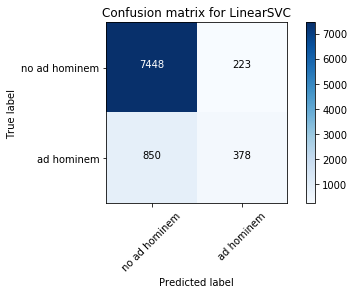

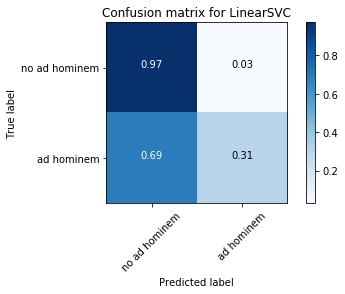

In [17]:
from sklearn.metrics import confusion_matrix
import itertools

predicted = clf.predict(x_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(test["isAdHominem"], predicted)
np.set_printoptions(precision=2)

title="Confusion matrix for " + LinearSVC.__name__

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

In [19]:
from sklearn.metrics import precision_score, f1_score, accuracy_score
p = precision_score(test["isAdHominem"], predicted)
r = recall_score(test["isAdHominem"], predicted)
f1 = f1_score(test["isAdHominem"], predicted)
a = accuracy_score(test["isAdHominem"], predicted)
print("A={} P={} R={} F1={}".format(a, p, r, f1))

A=0.8794246544555568 P=0.6289517470881864 R=0.30781758957654726 F1=0.41334062329141613


In [ ]:
v.vocabulary_

In [4]:
df = pd.read_csv("../../data/ad_hominem/ad_hominems_cleaned_Murilo.csv", sep=",", index_col=0, header=0, names=["body", "isAdHominem"])

In [5]:
df.head()

,body,isAdHominem
0,What makes corporations different in this case...,0
1,I'm sorry if your smugness gets in the way. Li...,1
2,"Basically to believe a patriarchy exists, you ...",0
3,The punishment for heresy was being burned at ...,0
4,No it doesn't. Sex is defined by DNA. DNA cann...,0


In [6]:
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.models import KeyedVectors

In [7]:
wv_from_bin = KeyedVectors.load_word2vec_format(datapath("/Users/pieterdelobelle/Downloads/GoogleNews-vectors-negative300.bin.gz"), binary=True)  # C binary format

In [ ]:
for k in v.vocabulary_:
    if k in wv_from_bin:
        print("{}: {}".format(k, wv_from_bin[k]) )

In [ ]:
print(v.transform(["and", "idiot"]))

In [ ]:
v.vocabulary_["and"]

In [ ]:
test = v.transform(["and", "idiot"])

In [11]:
test_x = np.zeros( (x_train.shape[0], len(v.vocabulary_), len(wv_from_bin["test"])))

In [12]:
from IPython.display import clear_output, display

for i in range(0,x_train.shape[0]):
    clear_output(wait=True)
    print("{} of {} ({} %)".format(i, x_train.shape[0], 100* i / x_train.shape[0]))
    for k in v.vocabulary_:
        if k in wv_from_bin:
            if x_train[i, v.vocabulary_[k]] != 0.0:
                test_x[i,v.vocabulary_[k]] = wv_from_bin[k]

20504 of 20505 (99.99512314069739 %)


In [13]:
len(wv_from_bin["test"])

300

In [14]:
test_y = np.zeros( (x_test.shape[0], len(v.vocabulary_), len(wv_from_bin["test"])))
for i in range(0,x_test.shape[0]):
    clear_output(wait=True)
    print("{} of {} ({} %)".format(i, x_test.shape[0], 100* i / x_test.shape[0]))
    for k in v.vocabulary_:
        if k in wv_from_bin:
            if x_test[i, v.vocabulary_[k]] != 0.0:
                test_y[i,v.vocabulary_[k]] = wv_from_bin[k]

8788 of 8789 (99.988622141313 %)


In [ ]:
test_x[0][0][:] = np.zeros(300)

In [ ]:
v.vocabulary_["idiot"]

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(test_x.reshape(test_x.shape[0],-1), train["isAdHominem"])

In [ ]:
test_x.shape[1]

In [ ]:
train["body"]

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

predicted = clf.predict(test_y.reshape(test_y.shape[0],-1))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test["isAdHominem"], predicted)

np.set_printoptions(precision=2)

title="Confusion matrix for " + LinearSVC.__name__

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["no ad hominem", "ad hominem"],normalize=False, 
                      title=title)

#print('plot exported as plt_n.png')
#fig.savefig("plt_n.png")

# Plot non-normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["no ad hominem", "ad hominem"],normalize=True, 
                      title=title)

In [ ]:
len(wv_from_bin.vocab)

In [ ]:
batch_size = 1000
epochs = 4

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Conv1D, Flatten
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import tensorflow as tf

model = Sequential()

model.add(Dense(64, input_shape=(1000,300,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(test_x, train["isAdHominem"],
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

In [15]:
np.save("test_3000", test_y)

OSError: 7910100000 requested and 197371904 written

In [2]:
for i in range(0,10):
    print( "{}\r".format(i))

0
1
2
3
4
5
6
7
8
9
